In [69]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
 #%%

# google colab configurations 
# these might change

# torch imports
import torch

# import utils
import json
from datetime import date
import os

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


    COLAB_CONFIG = '1o5nZNVmNBq3UQRxwYIwOATX0c0GyHPRN'
    COLAB_CONFIG_FILE ='colab_config.json'

    colab_json = drive.CreateFile({'id': COLAB_CONFIG})
    colab_json.GetContentFile(COLAB_CONFIG_FILE)

    with open(COLAB_CONFIG_FILE) as f:
        temp = f.read()
    colab_config = json.loads(temp)

    for key in colab_config:
        globals()[key] = drive.CreateFile({"id":colab_config[key]['id']})
        globals()[key].GetContentFile(colab_config[key]['file'])

    from trainer import RegressionTrainer
    from datageneration import DataGenerator
    from helpers import Helper, Plotter
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')

    # custom imports
    from cnp.trainer import RegressionTrainer
    from cnp.datageneration import DataGenerator
    from cnp.helpers import Helper

Running on Colab?

Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [71]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'1d_singlefunc_config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



In [72]:

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [73]:
default_conf['single_function']['training_params']['kwargs']['data_path'] = os.path.join(
    BASE_DIR,
    default_conf['single_function']['training_params']['kwargs']['data_dir'],
     default_conf['single_function']['training_params']['kwargs']['extension'],
    default_conf['single_function']['training_params']['kwargs']['data_file'])

## Generating data on the fly from a simple function.

In [139]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf['multiple_functions']['experiment_params'])

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 60.33542251586914
 Validation loss after 0 equals 21.166563034057617


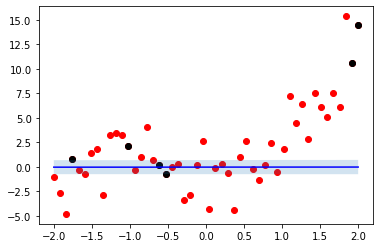

  1%|          | 67/10000 [00:00<14:35, 11.35it/s]

Mean loss at epoch 100 : 2.8514645099639893
 Validation loss after 100 equals 4.685399055480957


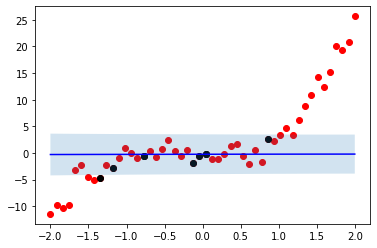

  2%|▏         | 175/10000 [00:00<04:03, 40.30it/s]

Mean loss at epoch 200 : 3.766754150390625
 Validation loss after 200 equals 2.855156660079956


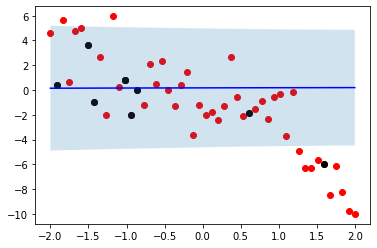

  3%|▎         | 279/10000 [00:01<01:30, 107.43it/s]

Mean loss at epoch 300 : 3.417581796646118
 Validation loss after 300 equals 3.2359542846679688


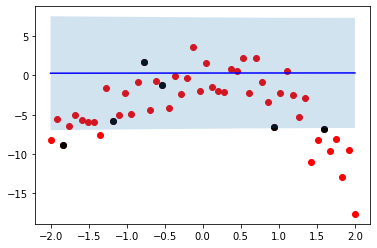

  4%|▍         | 400/10000 [00:02<00:53, 179.77it/s]

Mean loss at epoch 400 : 3.622464418411255
 Validation loss after 400 equals 2.492992877960205


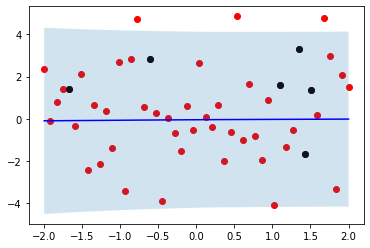

  5%|▍         | 484/10000 [00:02<00:52, 179.86it/s]

Mean loss at epoch 500 : 2.5299460887908936
 Validation loss after 500 equals 3.1900625228881836


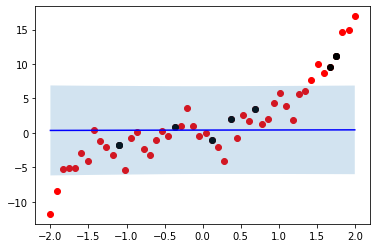

  6%|▌         | 587/10000 [00:03<00:45, 205.23it/s]

Mean loss at epoch 600 : 3.316122531890869
 Validation loss after 600 equals 3.584855079650879


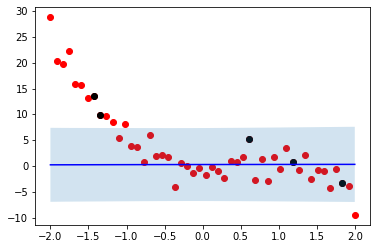

  7%|▋         | 699/10000 [00:04<00:44, 207.58it/s]

Mean loss at epoch 700 : 3.0929644107818604
 Validation loss after 700 equals 4.067241191864014


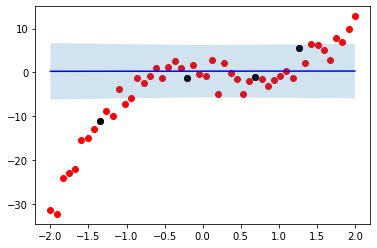

  8%|▊         | 782/10000 [00:04<00:47, 192.54it/s]

Mean loss at epoch 800 : 3.0174500942230225
 Validation loss after 800 equals 3.4551453590393066


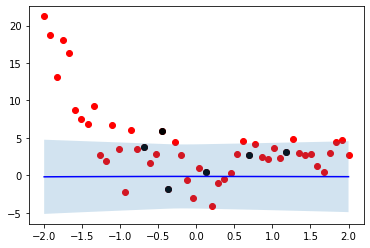

  9%|▉         | 893/10000 [00:05<00:43, 211.73it/s]

Mean loss at epoch 900 : 3.0357866287231445
 Validation loss after 900 equals 3.620710849761963


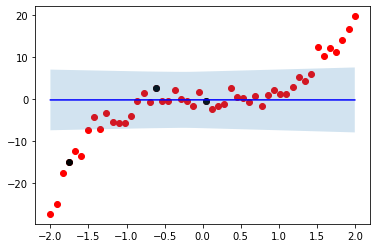

 10%|▉         | 995/10000 [00:05<00:45, 197.86it/s]

Mean loss at epoch 1000 : 3.4809317588806152
 Validation loss after 1000 equals 3.1578264236450195


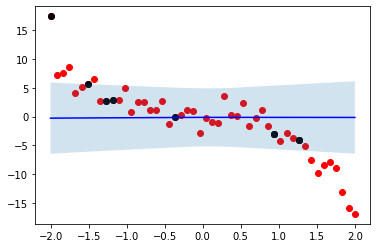

 11%|█         | 1079/10000 [00:06<00:46, 189.87it/s]

Mean loss at epoch 1100 : 2.7542874813079834
 Validation loss after 1100 equals 3.708772897720337


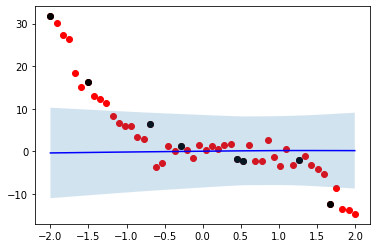

 12%|█▏        | 1199/10000 [00:07<00:45, 191.62it/s]

Mean loss at epoch 1200 : 2.633514404296875
 Validation loss after 1200 equals 2.7323720455169678


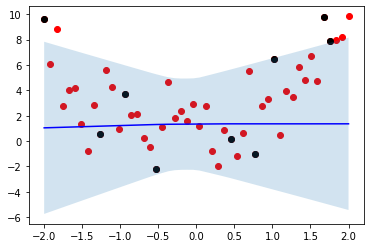

 13%|█▎        | 1276/10000 [00:07<00:49, 175.70it/s]

Mean loss at epoch 1300 : 2.7381417751312256
 Validation loss after 1300 equals 3.0352790355682373


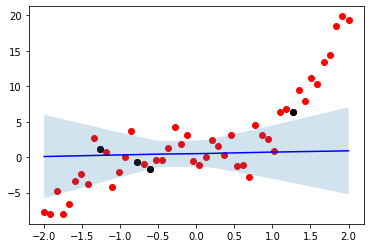

 14%|█▍        | 1385/10000 [00:08<00:52, 165.13it/s]

Mean loss at epoch 1400 : 3.2924728393554688
 Validation loss after 1400 equals 3.5079610347747803


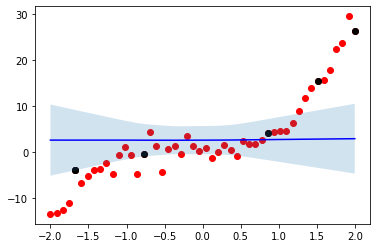

 15%|█▌        | 1500/10000 [00:09<00:46, 184.35it/s]

Mean loss at epoch 1500 : 2.814409017562866
 Validation loss after 1500 equals 2.577685832977295


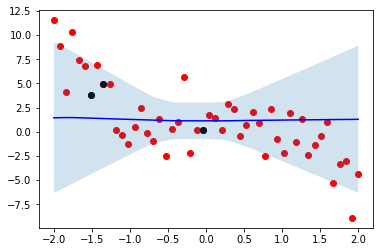

 16%|█▌        | 1582/10000 [00:09<00:45, 183.84it/s]

Mean loss at epoch 1600 : 2.793966054916382
 Validation loss after 1600 equals 2.8359365463256836


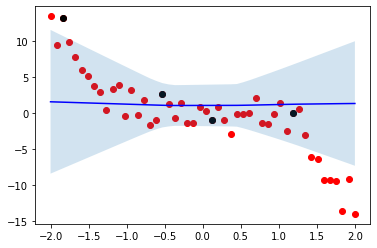

 17%|█▋        | 1689/10000 [00:10<00:41, 199.67it/s]

Mean loss at epoch 1700 : 2.7682409286499023
 Validation loss after 1700 equals 3.281972646713257


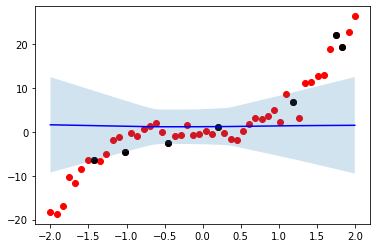

 18%|█▊        | 1796/10000 [00:10<00:39, 208.45it/s]

Mean loss at epoch 1800 : 2.662646532058716
 Validation loss after 1800 equals 2.5039069652557373


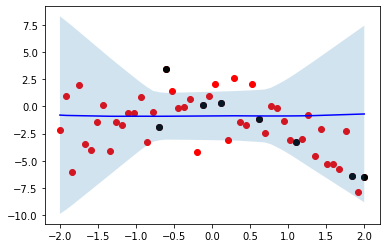

 19%|█▉        | 1884/10000 [00:11<00:39, 205.81it/s]

Mean loss at epoch 1900 : 2.4507229328155518
 Validation loss after 1900 equals 3.5978031158447266


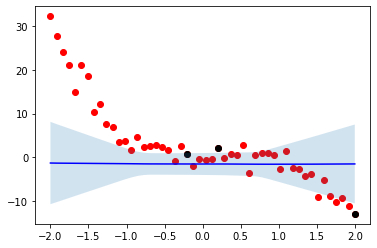

 20%|█▉        | 1973/10000 [00:11<00:37, 212.27it/s]

Mean loss at epoch 2000 : 2.560023784637451
 Validation loss after 2000 equals 2.678802490234375


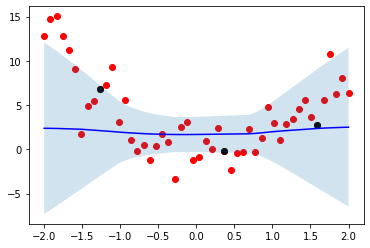

 21%|██        | 2086/10000 [00:12<00:36, 219.02it/s]

Mean loss at epoch 2100 : 2.848597288131714
 Validation loss after 2100 equals 2.7146172523498535


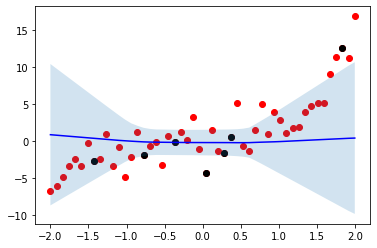

 22%|██▏       | 2174/10000 [00:12<00:36, 213.69it/s]

Mean loss at epoch 2200 : 2.609469413757324
 Validation loss after 2200 equals 2.725639581680298


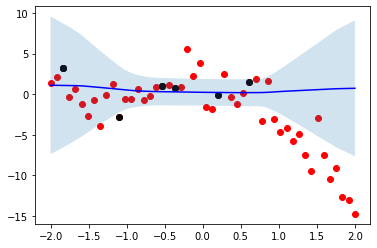

 23%|██▎       | 2292/10000 [00:13<00:33, 227.11it/s]

Mean loss at epoch 2300 : 3.1689584255218506
 Validation loss after 2300 equals 2.7649292945861816


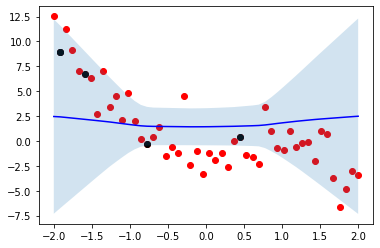

 24%|██▎       | 2371/10000 [00:13<00:39, 195.42it/s]

Mean loss at epoch 2400 : 3.1210577487945557
 Validation loss after 2400 equals 2.8655800819396973


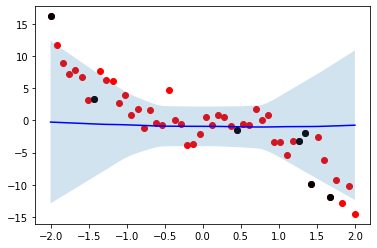

 25%|██▍       | 2476/10000 [00:14<00:37, 201.52it/s]

Mean loss at epoch 2500 : 2.9299302101135254
 Validation loss after 2500 equals 2.8501574993133545


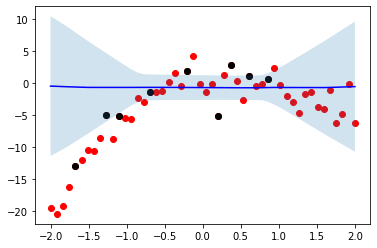

 26%|██▌       | 2577/10000 [00:14<00:36, 202.76it/s]

Mean loss at epoch 2600 : 3.1578335762023926
 Validation loss after 2600 equals 3.3299570083618164


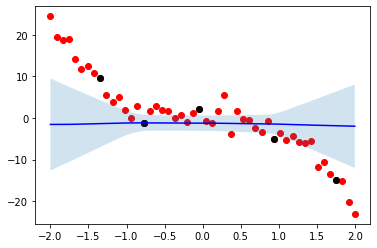

 27%|██▋       | 2694/10000 [00:15<00:32, 227.72it/s]

Mean loss at epoch 2700 : 3.7615561485290527
 Validation loss after 2700 equals 3.014086961746216


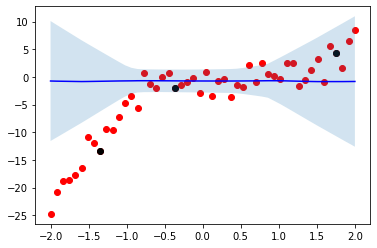

 28%|██▊       | 2783/10000 [00:16<00:35, 205.35it/s]

Mean loss at epoch 2800 : 2.7311670780181885
 Validation loss after 2800 equals 2.7642993927001953


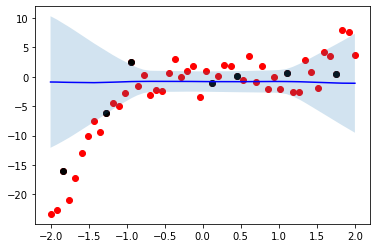

 29%|██▉       | 2888/10000 [00:16<00:33, 209.57it/s]

Mean loss at epoch 2900 : 2.711188793182373
 Validation loss after 2900 equals 2.9750070571899414


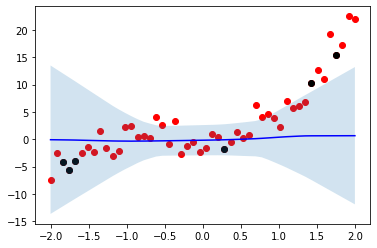

 30%|██▉       | 2970/10000 [00:17<00:35, 199.19it/s]

Mean loss at epoch 3000 : 2.8384578227996826
 Validation loss after 3000 equals 2.8881478309631348


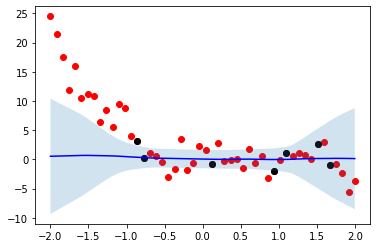

 31%|███       | 3087/10000 [00:17<00:30, 226.62it/s]

Mean loss at epoch 3100 : 3.1124253273010254
 Validation loss after 3100 equals 2.7655997276306152


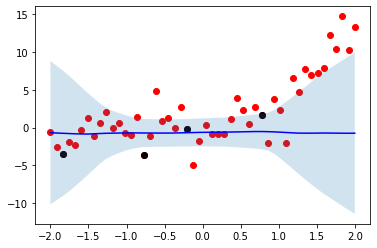

 32%|███▏      | 3194/10000 [00:18<00:30, 219.79it/s]

Mean loss at epoch 3200 : 2.2051563262939453
 Validation loss after 3200 equals 2.8611083030700684


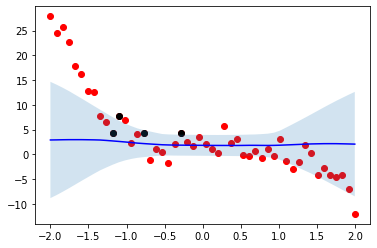

 33%|███▎      | 3275/10000 [00:18<00:33, 198.30it/s]

Mean loss at epoch 3300 : 2.5201711654663086
 Validation loss after 3300 equals 2.7377614974975586


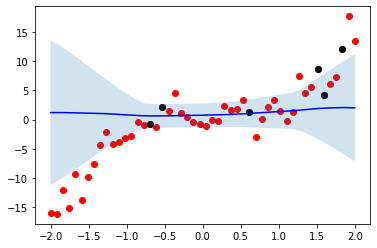

 34%|███▎      | 3373/10000 [00:19<00:33, 199.99it/s]

Mean loss at epoch 3400 : 2.1615724563598633
 Validation loss after 3400 equals 2.6114745140075684


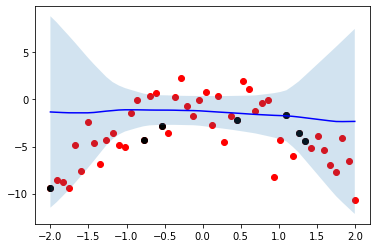

 35%|███▍      | 3497/10000 [00:19<00:31, 207.92it/s]

Mean loss at epoch 3500 : 2.5670180320739746
 Validation loss after 3500 equals 2.492233991622925


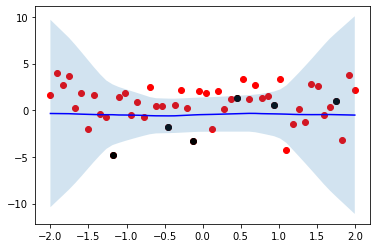

 36%|███▌      | 3575/10000 [00:20<00:35, 181.86it/s]

Mean loss at epoch 3600 : 2.567124605178833
 Validation loss after 3600 equals 2.535244941711426


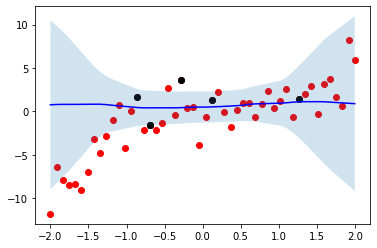

 37%|███▋      | 3672/10000 [00:21<00:35, 179.38it/s]

Mean loss at epoch 3700 : 2.533748149871826
 Validation loss after 3700 equals 2.4006340503692627


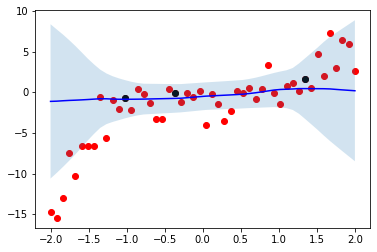

 38%|███▊      | 3791/10000 [00:21<00:28, 220.16it/s]

Mean loss at epoch 3800 : 2.759737968444824
 Validation loss after 3800 equals 2.9235334396362305


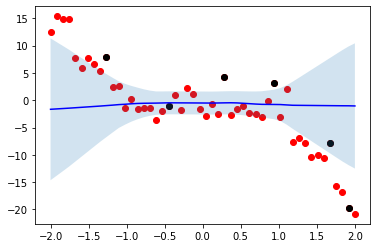

 39%|███▉      | 3879/10000 [00:22<00:28, 211.96it/s]

Mean loss at epoch 3900 : 2.2615654468536377
 Validation loss after 3900 equals 2.87821626663208


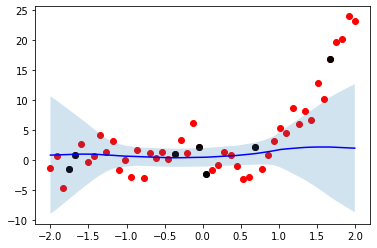

 40%|███▉      | 3997/10000 [00:22<00:26, 223.77it/s]

Mean loss at epoch 4000 : 2.7757925987243652
 Validation loss after 4000 equals 2.677018642425537


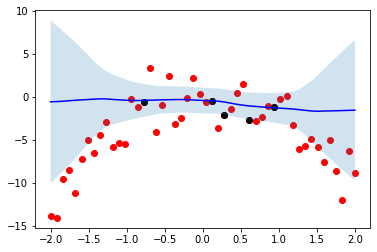

 41%|████      | 4090/10000 [00:23<00:26, 220.05it/s]

Mean loss at epoch 4100 : 2.382474660873413
 Validation loss after 4100 equals 2.6086173057556152


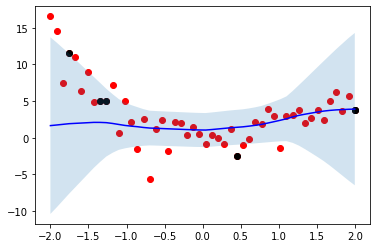

 42%|████▏     | 4194/10000 [00:23<00:27, 214.35it/s]

Mean loss at epoch 4200 : 2.613598108291626
 Validation loss after 4200 equals 2.5761466026306152


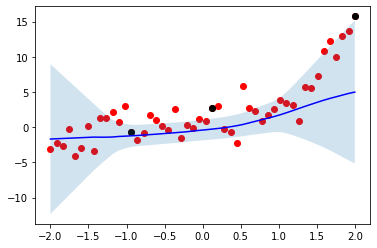

 43%|████▎     | 4282/10000 [00:24<00:27, 207.64it/s]

Mean loss at epoch 4300 : 2.656961679458618
 Validation loss after 4300 equals 2.731869697570801


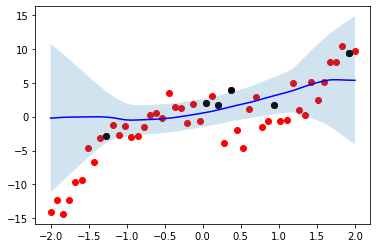

 44%|████▍     | 4394/10000 [00:24<00:27, 201.60it/s]

Mean loss at epoch 4400 : 2.1038262844085693
 Validation loss after 4400 equals 3.104682683944702


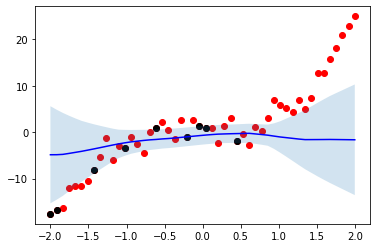

 45%|████▍     | 4478/10000 [00:25<00:27, 200.70it/s]

Mean loss at epoch 4500 : 3.0710558891296387
 Validation loss after 4500 equals 2.6558380126953125


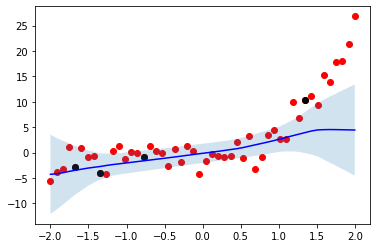

 46%|████▌     | 4589/10000 [00:25<00:25, 209.80it/s]

Mean loss at epoch 4600 : 2.9963834285736084
 Validation loss after 4600 equals 2.864074945449829


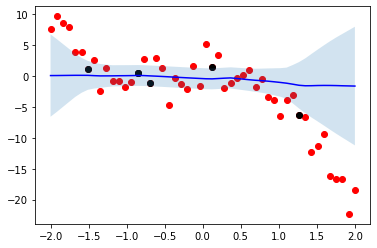

 47%|████▋     | 4692/10000 [00:26<00:27, 195.89it/s]

Mean loss at epoch 4700 : 2.83736252784729
 Validation loss after 4700 equals 2.879689931869507


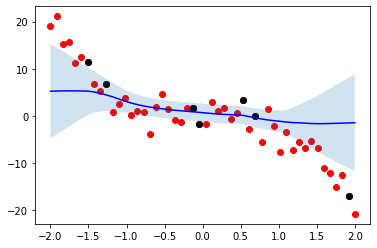

 48%|████▊     | 4775/10000 [00:27<00:27, 192.53it/s]

Mean loss at epoch 4800 : 2.3164377212524414
 Validation loss after 4800 equals 2.4936060905456543


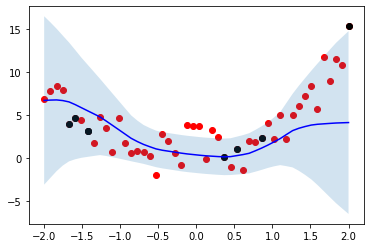

 49%|████▊     | 4874/10000 [00:27<00:25, 203.96it/s]

Mean loss at epoch 4900 : 2.537952184677124
 Validation loss after 4900 equals 3.149550676345825


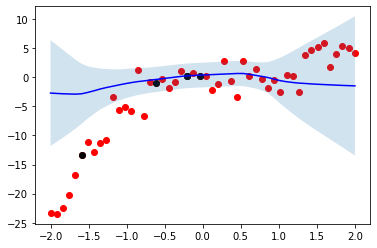

 50%|████▉     | 4989/10000 [00:28<00:22, 225.57it/s]

Mean loss at epoch 5000 : 2.9859094619750977
 Validation loss after 5000 equals 2.758737087249756


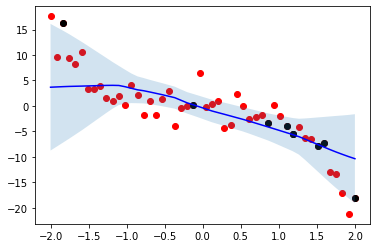

 51%|█████     | 5073/10000 [00:28<00:23, 207.36it/s]

Mean loss at epoch 5100 : 2.258575916290283
 Validation loss after 5100 equals 3.0273847579956055


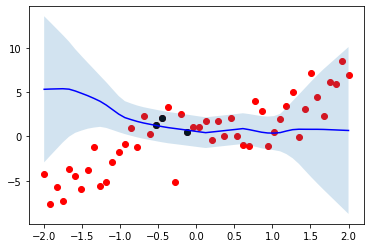

 52%|█████▏    | 5192/10000 [00:29<00:20, 234.56it/s]

Mean loss at epoch 5200 : 2.611035108566284
 Validation loss after 5200 equals 2.3992867469787598


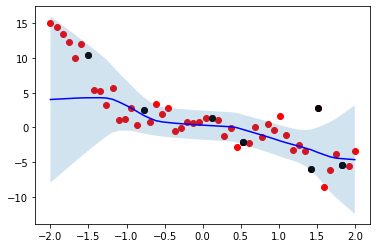

 53%|█████▎    | 5280/10000 [00:29<00:23, 204.84it/s]

Mean loss at epoch 5300 : 2.870246410369873
 Validation loss after 5300 equals 2.66347599029541


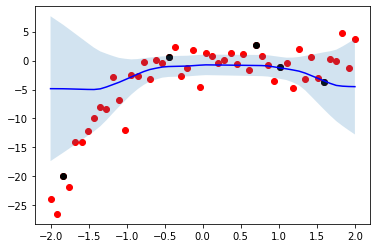

 54%|█████▍    | 5388/10000 [00:30<00:21, 215.45it/s]

Mean loss at epoch 5400 : 2.3568646907806396
 Validation loss after 5400 equals 2.4812259674072266


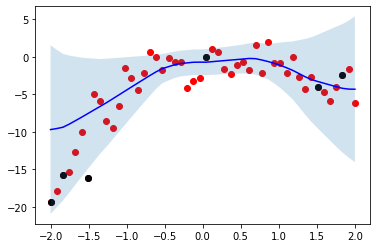

 55%|█████▍    | 5487/10000 [00:30<00:22, 199.27it/s]

Mean loss at epoch 5500 : 2.4552907943725586
 Validation loss after 5500 equals 2.883746862411499


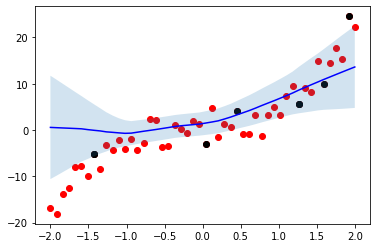

 56%|█████▌    | 5600/10000 [00:31<00:20, 217.92it/s]

Mean loss at epoch 5600 : 2.8795042037963867
 Validation loss after 5600 equals 2.7636525630950928


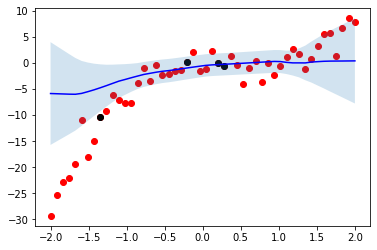

 57%|█████▋    | 5687/10000 [00:31<00:20, 208.54it/s]

Mean loss at epoch 5700 : 2.5550947189331055
 Validation loss after 5700 equals 2.7420389652252197


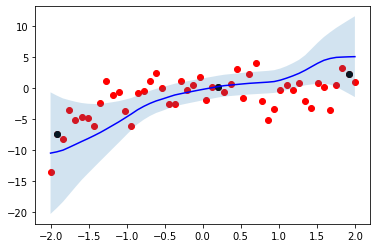

 58%|█████▊    | 5778/10000 [00:32<00:19, 213.21it/s]

Mean loss at epoch 5800 : 2.3319525718688965
 Validation loss after 5800 equals 2.669065237045288


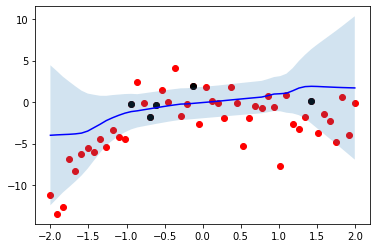

 59%|█████▉    | 5889/10000 [00:33<00:19, 206.01it/s]

Mean loss at epoch 5900 : 2.529305934906006
 Validation loss after 5900 equals 2.4447836875915527


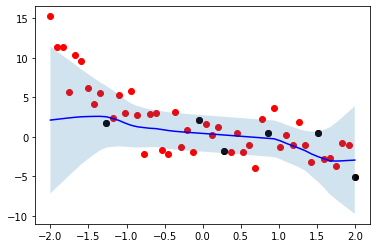

 60%|█████▉    | 5980/10000 [00:33<00:19, 209.87it/s]

Mean loss at epoch 6000 : 2.4356513023376465
 Validation loss after 6000 equals 3.041470527648926


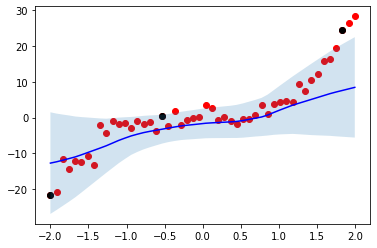

 61%|██████    | 6099/10000 [00:34<00:16, 233.04it/s]

Mean loss at epoch 6100 : 2.183241367340088
 Validation loss after 6100 equals 2.5307869911193848


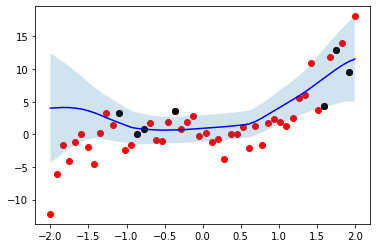

 62%|██████▏   | 6183/10000 [00:34<00:18, 210.72it/s]

Mean loss at epoch 6200 : 2.452465772628784
 Validation loss after 6200 equals 2.8830041885375977


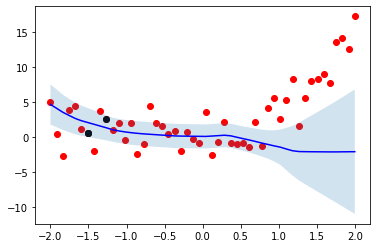

 63%|██████▎   | 6295/10000 [00:35<00:16, 219.41it/s]

Mean loss at epoch 6300 : 1.890114188194275
 Validation loss after 6300 equals 2.2731337547302246


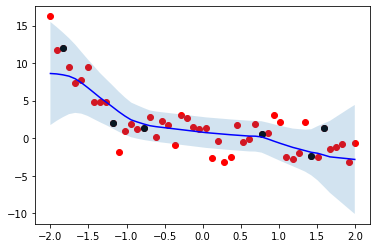

 64%|██████▍   | 6396/10000 [00:35<00:17, 205.58it/s]

Mean loss at epoch 6400 : 2.6506905555725098
 Validation loss after 6400 equals 2.710284471511841


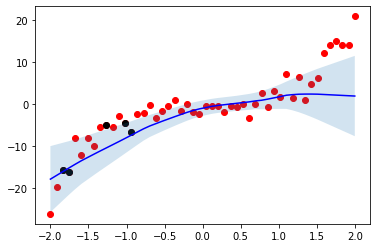

 65%|██████▍   | 6471/10000 [00:36<00:18, 187.30it/s]

Mean loss at epoch 6500 : 2.191004753112793
 Validation loss after 6500 equals 2.4036667346954346


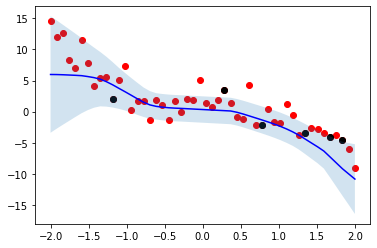

 66%|██████▌   | 6581/10000 [00:36<00:15, 215.04it/s]

Mean loss at epoch 6600 : 2.5186595916748047
 Validation loss after 6600 equals 2.4867165088653564


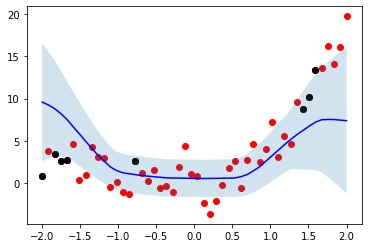

 67%|██████▋   | 6682/10000 [00:37<00:15, 208.72it/s]

Mean loss at epoch 6700 : 2.361985445022583
 Validation loss after 6700 equals 2.492435932159424


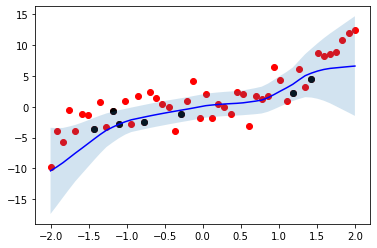

 68%|██████▊   | 6770/10000 [00:37<00:15, 208.45it/s]

Mean loss at epoch 6800 : 2.633321523666382
 Validation loss after 6800 equals 2.3892526626586914


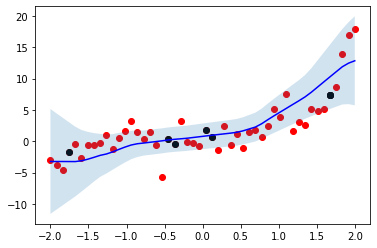

 69%|██████▉   | 6881/10000 [00:38<00:13, 222.95it/s]

Mean loss at epoch 6900 : 2.1039719581604004
 Validation loss after 6900 equals 2.5115890502929688


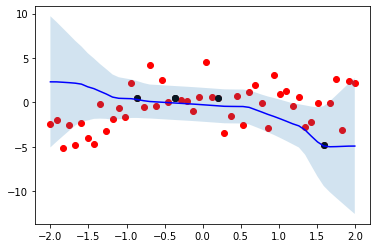

 70%|██████▉   | 6997/10000 [00:38<00:13, 229.53it/s]

Mean loss at epoch 7000 : 2.5833687782287598
 Validation loss after 7000 equals 2.804851770401001


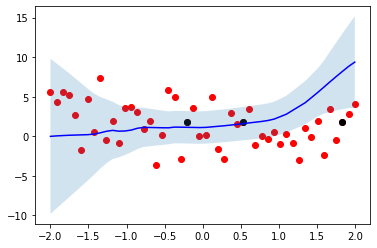

 71%|███████   | 7088/10000 [00:39<00:14, 206.93it/s]

Mean loss at epoch 7100 : 2.592059373855591
 Validation loss after 7100 equals 2.517944812774658


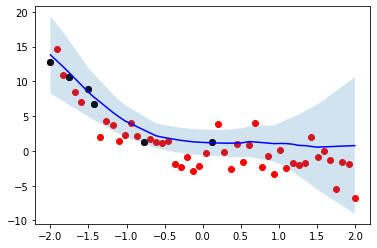

 72%|███████▏  | 7178/10000 [00:39<00:13, 213.74it/s]

Mean loss at epoch 7200 : 2.5465433597564697
 Validation loss after 7200 equals 2.4180142879486084


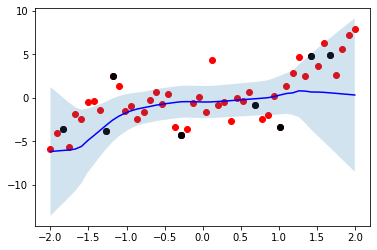

 73%|███████▎  | 7296/10000 [00:40<00:11, 229.14it/s]

Mean loss at epoch 7300 : 2.5937600135803223
 Validation loss after 7300 equals 2.4584946632385254


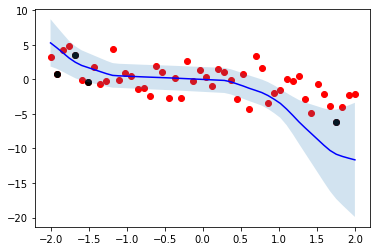

 74%|███████▍  | 7384/10000 [00:40<00:12, 204.41it/s]

Mean loss at epoch 7400 : 2.697782039642334
 Validation loss after 7400 equals 2.473379611968994


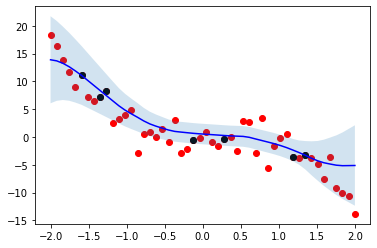

 75%|███████▍  | 7471/10000 [00:41<00:12, 203.36it/s]

Mean loss at epoch 7500 : 2.3166770935058594
 Validation loss after 7500 equals 2.586754560470581


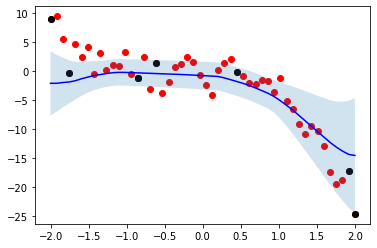

 76%|███████▌  | 7579/10000 [00:42<00:11, 212.40it/s]

Mean loss at epoch 7600 : 2.358222723007202
 Validation loss after 7600 equals 2.366745710372925


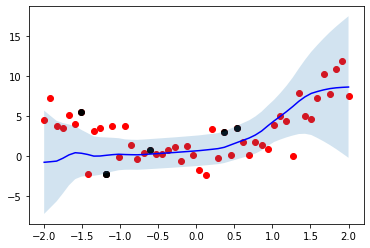

 77%|███████▋  | 7695/10000 [00:42<00:10, 229.76it/s]

Mean loss at epoch 7700 : 2.250105142593384
 Validation loss after 7700 equals 2.7380080223083496


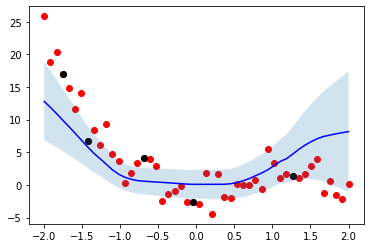

 78%|███████▊  | 7777/10000 [00:43<00:11, 198.26it/s]

Mean loss at epoch 7800 : 3.1014902591705322
 Validation loss after 7800 equals 2.2035324573516846


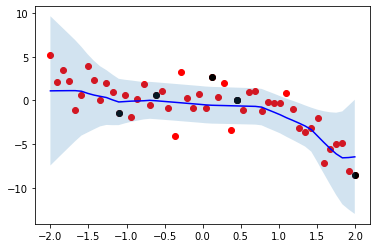

 79%|███████▉  | 7895/10000 [00:43<00:09, 226.18it/s]

Mean loss at epoch 7900 : 2.203677177429199
 Validation loss after 7900 equals 2.3171608448028564


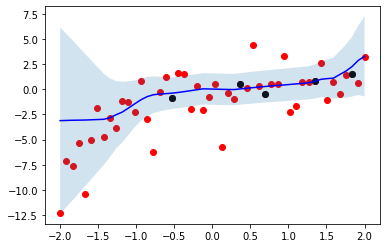

 80%|███████▉  | 7975/10000 [00:44<00:10, 195.53it/s]

Mean loss at epoch 8000 : 2.2101831436157227
 Validation loss after 8000 equals 2.841444730758667


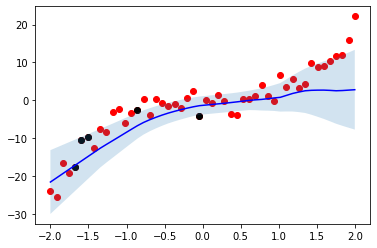

 81%|████████  | 8072/10000 [00:44<00:09, 197.32it/s]

Mean loss at epoch 8100 : 2.4924380779266357
 Validation loss after 8100 equals 2.4584884643554688


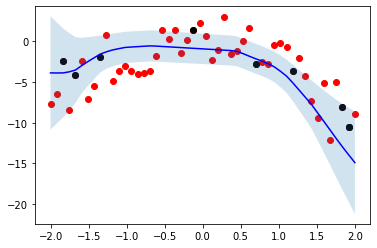

 82%|████████▏ | 8188/10000 [00:45<00:08, 226.19it/s]

Mean loss at epoch 8200 : 2.730123996734619
 Validation loss after 8200 equals 2.360886335372925


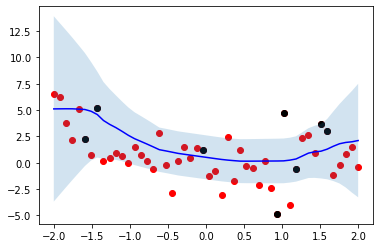

 83%|████████▎ | 8274/10000 [00:45<00:08, 197.78it/s]

Mean loss at epoch 8300 : 2.0339608192443848
 Validation loss after 8300 equals 2.255737066268921


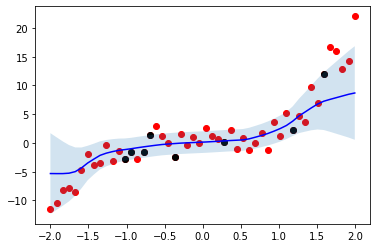

 84%|████████▍ | 8384/10000 [00:46<00:07, 214.61it/s]

Mean loss at epoch 8400 : 1.9094345569610596
 Validation loss after 8400 equals 2.4429593086242676


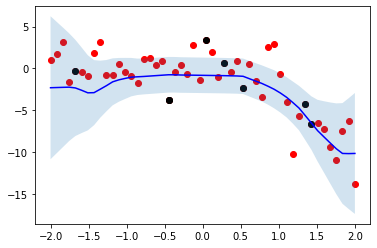

 85%|████████▍ | 8499/10000 [00:46<00:06, 228.15it/s]

Mean loss at epoch 8500 : 2.5716910362243652
 Validation loss after 8500 equals 2.510312795639038


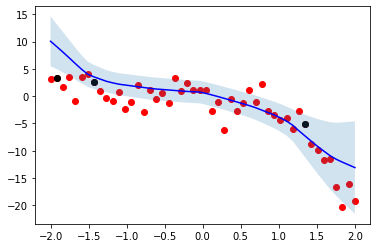

 86%|████████▌ | 8590/10000 [00:47<00:06, 219.55it/s]

Mean loss at epoch 8600 : 2.2468056678771973
 Validation loss after 8600 equals 2.2917957305908203


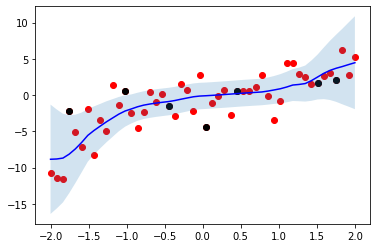

 87%|████████▋ | 8700/10000 [00:47<00:06, 212.49it/s]

Mean loss at epoch 8700 : 2.1507036685943604
 Validation loss after 8700 equals 2.3530352115631104


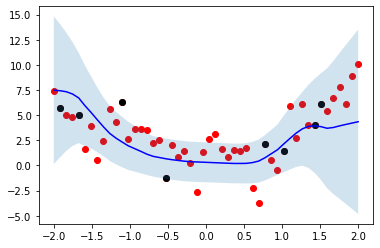

 88%|████████▊ | 8783/10000 [00:48<00:06, 199.20it/s]

Mean loss at epoch 8800 : 2.410635471343994
 Validation loss after 8800 equals 3.7156107425689697


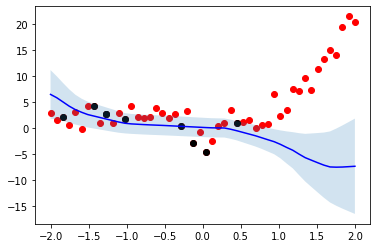

 89%|████████▉ | 8892/10000 [00:49<00:05, 214.21it/s]

Mean loss at epoch 8900 : 2.0850374698638916
 Validation loss after 8900 equals 2.713346481323242


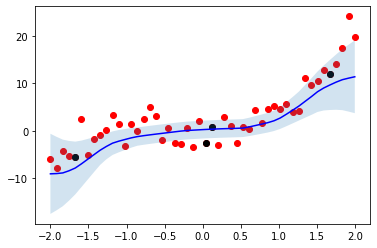

 90%|████████▉ | 8975/10000 [00:49<00:05, 201.70it/s]

Mean loss at epoch 9000 : 2.637390375137329
 Validation loss after 9000 equals 2.4676971435546875


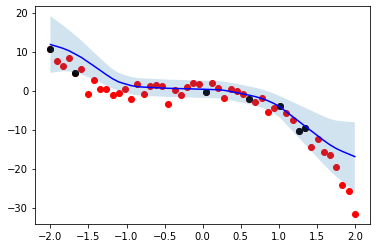

 91%|█████████ | 9083/10000 [00:50<00:04, 216.80it/s]

Mean loss at epoch 9100 : 2.433671474456787
 Validation loss after 9100 equals 2.4077367782592773


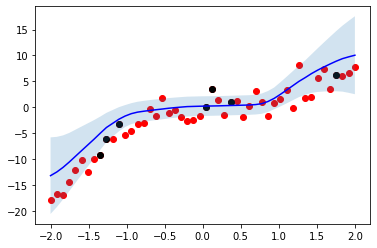

 92%|█████████▏| 9192/10000 [00:50<00:03, 212.48it/s]

Mean loss at epoch 9200 : 2.638141632080078
 Validation loss after 9200 equals 2.9716176986694336


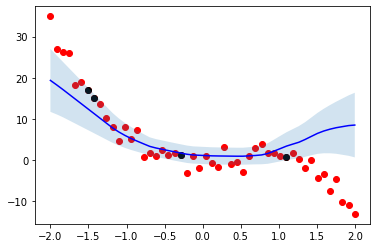

 93%|█████████▎| 9279/10000 [00:51<00:03, 206.56it/s]

Mean loss at epoch 9300 : 2.6522762775421143
 Validation loss after 9300 equals 2.5358808040618896


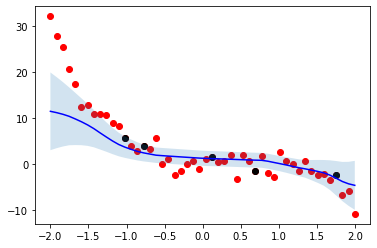

 94%|█████████▍| 9399/10000 [00:51<00:02, 233.09it/s]

Mean loss at epoch 9400 : 3.5747458934783936
 Validation loss after 9400 equals 3.0473721027374268


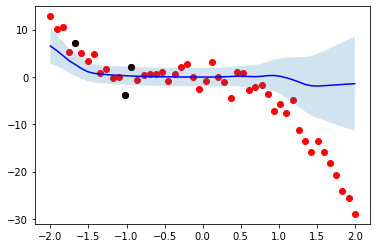

 95%|█████████▍| 9489/10000 [00:52<00:02, 206.88it/s]

Mean loss at epoch 9500 : 1.8425288200378418
 Validation loss after 9500 equals 2.5341875553131104


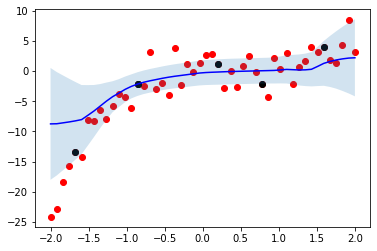

 96%|█████████▌| 9575/10000 [00:52<00:02, 196.24it/s]

Mean loss at epoch 9600 : 2.499861240386963
 Validation loss after 9600 equals 2.6373326778411865


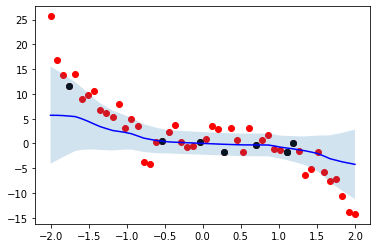

 97%|█████████▋| 9674/10000 [00:53<00:01, 200.29it/s]

Mean loss at epoch 9700 : 2.0574045181274414
 Validation loss after 9700 equals 2.5680813789367676


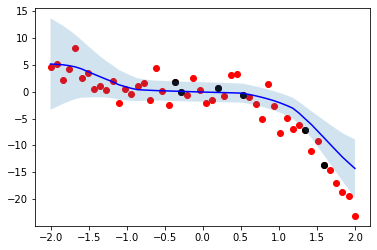

 98%|█████████▊| 9781/10000 [00:53<00:01, 205.20it/s]

Mean loss at epoch 9800 : 2.781398057937622
 Validation loss after 9800 equals 2.3835082054138184


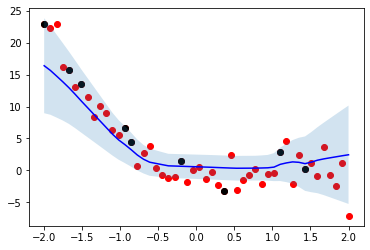

 99%|█████████▉| 9895/10000 [00:54<00:00, 210.99it/s]

Mean loss at epoch 9900 : 2.5575926303863525
 Validation loss after 9900 equals 2.583195209503174


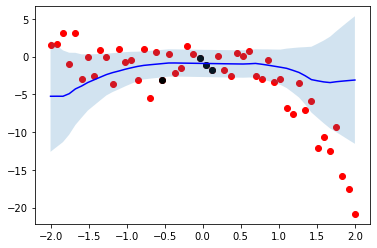

100%|█████████▉| 9983/10000 [00:54<00:00, 208.46it/s]

KeyboardInterrupt: 

In [140]:
model_weights = trainer.run_training(**default_conf['multiple_functions']['training_params'])



## Using different datapoints from the same function

In [74]:
trainer = RegressionTrainer(**default_conf['single_function']['experiment_params'])

  0%|          | 0/100000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 45.858707427978516
 Validation loss after 0 equals 29.153228759765625


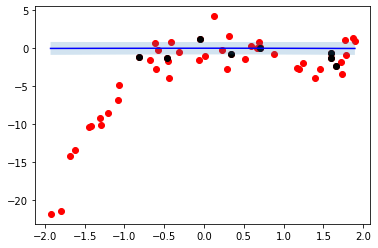

  1%|          | 1000/100000 [00:33<45:32, 36.23it/s] 

Mean loss at epoch 1000 : 3.2161900997161865
 Validation loss after 1000 equals 3.116722583770752


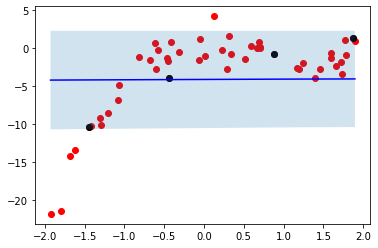

  2%|▏         | 2000/100000 [01:02<46:37, 35.04it/s]  

Mean loss at epoch 2000 : 3.156686305999756
 Validation loss after 2000 equals 3.2203824520111084


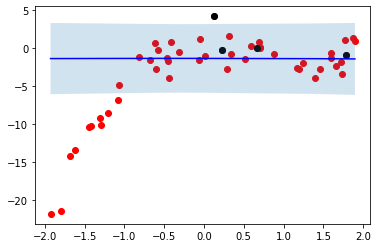

  3%|▎         | 3000/100000 [01:31<46:39, 34.65it/s]  

Mean loss at epoch 3000 : 3.126138925552368
 Validation loss after 3000 equals 3.2266783714294434


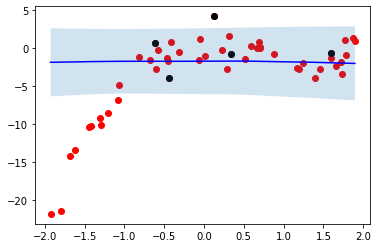

  4%|▍         | 4000/100000 [02:01<46:20, 34.53it/s]  

Mean loss at epoch 4000 : 3.0290849208831787
 Validation loss after 4000 equals 3.205040693283081


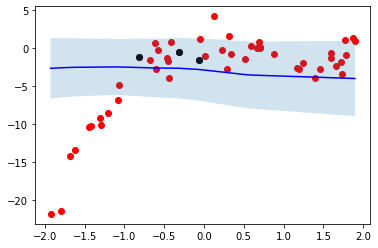

  5%|▍         | 4999/100000 [02:32<47:05, 33.62it/s]  

Mean loss at epoch 5000 : 3.1138134002685547
 Validation loss after 5000 equals 2.998362898826599


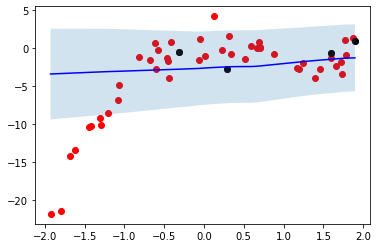

  6%|▌         | 6000/100000 [03:02<45:50, 34.18it/s]  

Mean loss at epoch 6000 : 3.0965240001678467
 Validation loss after 6000 equals 2.9734236001968384


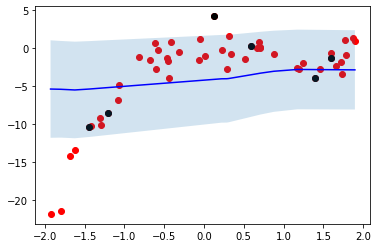

  7%|▋         | 7000/100000 [03:33<45:30, 34.06it/s]  

Mean loss at epoch 7000 : 3.385617256164551
 Validation loss after 7000 equals 3.0127527713775635


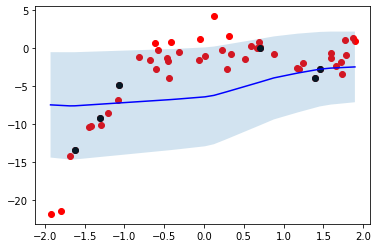

  8%|▊         | 7999/100000 [04:03<46:58, 32.64it/s]  

Mean loss at epoch 8000 : 3.1504244804382324
 Validation loss after 8000 equals 3.2620643377304077


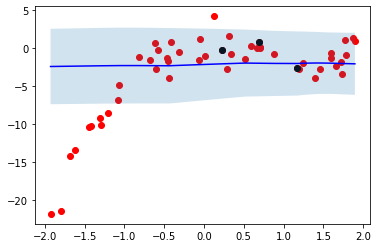

  9%|▉         | 8997/100000 [04:34<46:51, 32.37it/s]  

Mean loss at epoch 9000 : 2.991823673248291
 Validation loss after 9000 equals 2.9214688539505005


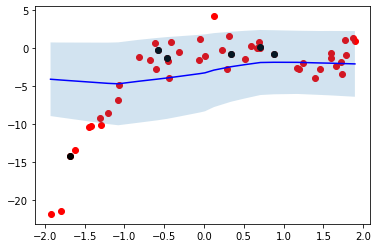

 10%|▉         | 9998/100000 [05:08<50:38, 29.62it/s]  

Mean loss at epoch 10000 : 3.0538790225982666
 Validation loss after 10000 equals 2.9232031106948853


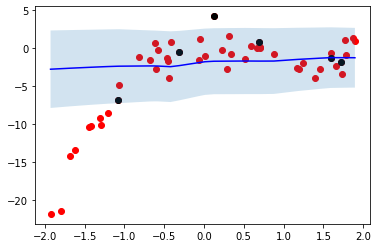

 11%|█         | 10998/100000 [05:41<44:06, 33.63it/s]  

Mean loss at epoch 11000 : 3.383751392364502
 Validation loss after 11000 equals 2.8910820484161377


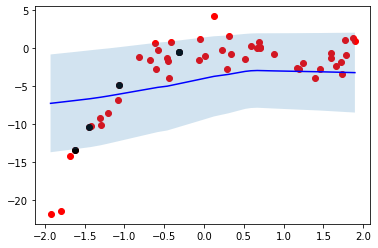

 12%|█▏        | 11997/100000 [06:12<45:25, 32.29it/s]  

Mean loss at epoch 12000 : 3.2403855323791504
 Validation loss after 12000 equals 2.879936456680298


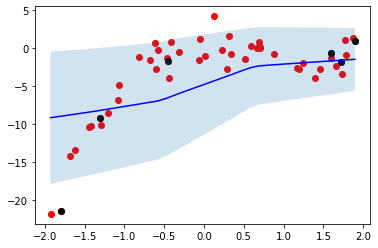

 13%|█▎        | 12997/100000 [06:43<43:12, 33.57it/s]  

Mean loss at epoch 13000 : 3.2918331623077393
 Validation loss after 13000 equals 2.9777255058288574


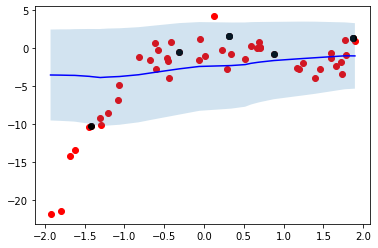

 14%|█▍        | 14000/100000 [07:14<43:30, 32.94it/s]  

Mean loss at epoch 14000 : 2.871424674987793
 Validation loss after 14000 equals 2.980312466621399


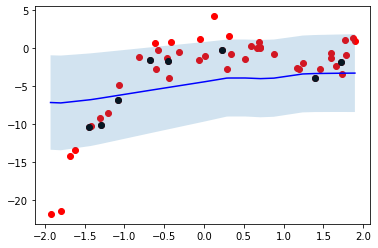

 15%|█▌        | 15000/100000 [07:45<42:27, 33.37it/s]  

Mean loss at epoch 15000 : 3.1024460792541504
 Validation loss after 15000 equals 2.937883734703064


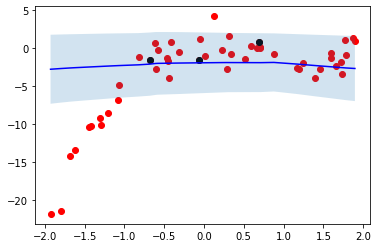

 16%|█▌        | 16000/100000 [08:16<46:05, 30.37it/s]  

Mean loss at epoch 16000 : 3.2616991996765137
 Validation loss after 16000 equals 2.887045979499817


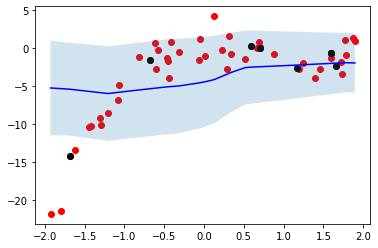

 17%|█▋        | 17000/100000 [08:48<44:19, 31.21it/s]  

Mean loss at epoch 17000 : 3.249695062637329
 Validation loss after 17000 equals 3.0417944192886353


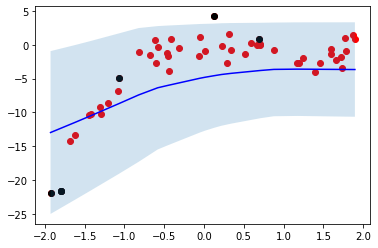

 18%|█▊        | 17999/100000 [09:20<43:55, 31.11it/s]  

Mean loss at epoch 18000 : 3.143202781677246
 Validation loss after 18000 equals 2.9189523458480835


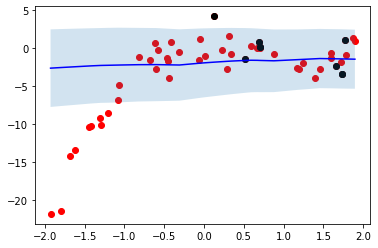

 19%|█▉        | 18999/100000 [09:52<41:44, 32.34it/s]  

Mean loss at epoch 19000 : 3.0773677825927734
 Validation loss after 19000 equals 2.824539065361023


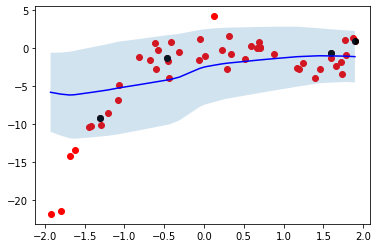

 20%|█▉        | 19998/100000 [10:23<44:58, 29.64it/s]  

Mean loss at epoch 20000 : 3.111666202545166
 Validation loss after 20000 equals 2.902147054672241


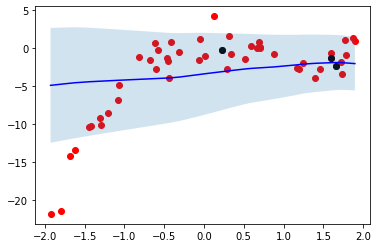

 21%|██        | 21000/100000 [10:55<39:54, 32.99it/s]  

Mean loss at epoch 21000 : 3.029017448425293
 Validation loss after 21000 equals 3.152898669242859


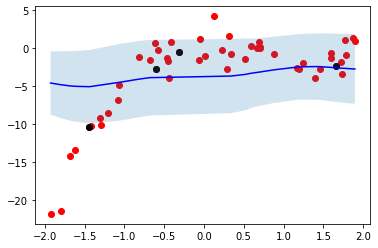

 22%|██▏       | 21999/100000 [11:26<39:28, 32.93it/s]

Mean loss at epoch 22000 : 3.0851316452026367
 Validation loss after 22000 equals 2.785913348197937


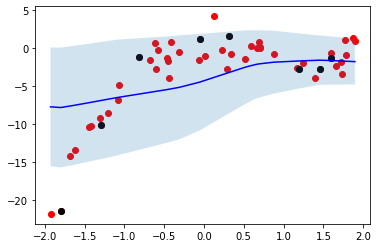

 23%|██▎       | 22998/100000 [11:57<38:56, 32.95it/s]

Mean loss at epoch 23000 : 2.9725170135498047
 Validation loss after 23000 equals 2.881868839263916


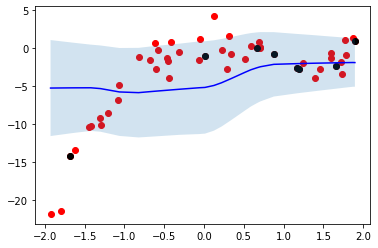

 24%|██▍       | 23999/100000 [12:29<39:09, 32.35it/s]

Mean loss at epoch 24000 : 3.306670665740967
 Validation loss after 24000 equals 2.964484214782715


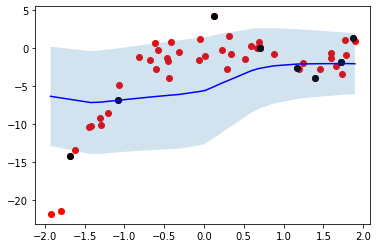

 25%|██▍       | 24999/100000 [13:01<2:38:59,  7.86it/s]

Mean loss at epoch 25000 : 3.2058372497558594
 Validation loss after 25000 equals 2.9793940782546997


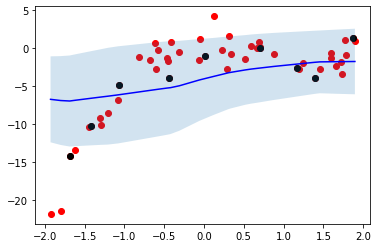

 26%|██▌       | 25998/100000 [13:43<57:12, 21.56it/s]  

Mean loss at epoch 26000 : 3.1495418548583984
 Validation loss after 26000 equals 2.882269263267517


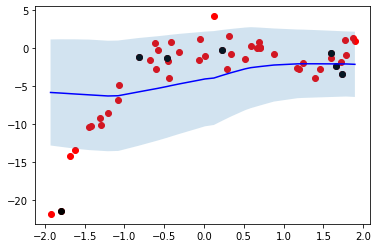

 27%|██▋       | 26998/100000 [14:19<44:54, 27.09it/s]  

Mean loss at epoch 27000 : 2.9512534141540527
 Validation loss after 27000 equals 2.9887040853500366


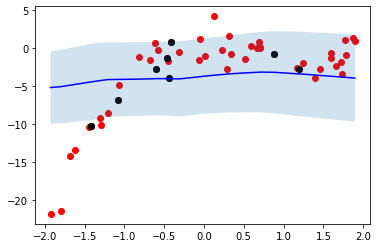

 28%|██▊       | 27997/100000 [14:49<33:51, 35.44it/s]  

Mean loss at epoch 28000 : 3.163912296295166
 Validation loss after 28000 equals 2.939401626586914


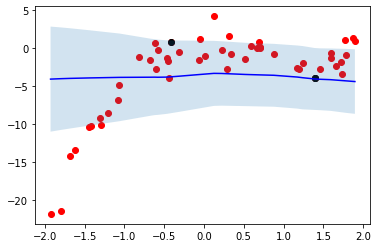

 29%|██▉       | 28998/100000 [15:24<54:37, 21.66it/s]  

Mean loss at epoch 29000 : 3.0234618186950684
 Validation loss after 29000 equals 2.90918231010437


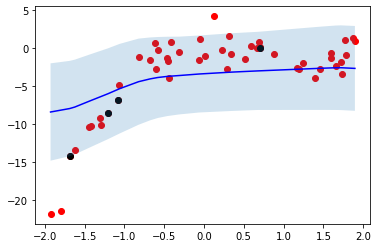

 30%|███       | 30000/100000 [15:57<43:10, 27.02it/s]  

Mean loss at epoch 30000 : 3.1140527725219727
 Validation loss after 30000 equals 2.875674605369568


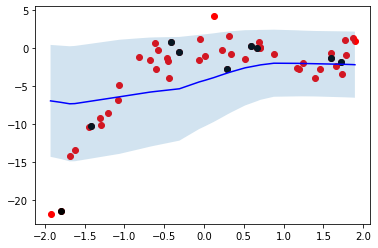

 31%|███       | 30998/100000 [16:33<51:22, 22.39it/s]  

Mean loss at epoch 31000 : 3.1064064502716064
 Validation loss after 31000 equals 2.8751288652420044


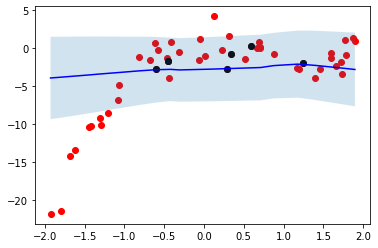

 32%|███▏      | 31998/100000 [17:04<34:17, 33.05it/s]  

Mean loss at epoch 32000 : 3.2195067405700684
 Validation loss after 32000 equals 3.203789472579956


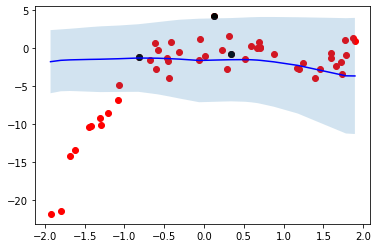

 33%|███▎      | 32997/100000 [17:34<32:45, 34.09it/s]

Mean loss at epoch 33000 : 3.0817012786865234
 Validation loss after 33000 equals 2.85856294631958


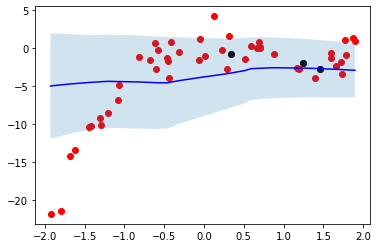

 34%|███▍      | 33999/100000 [18:04<32:50, 33.49it/s]

Mean loss at epoch 34000 : 3.144834518432617
 Validation loss after 34000 equals 2.9737722873687744


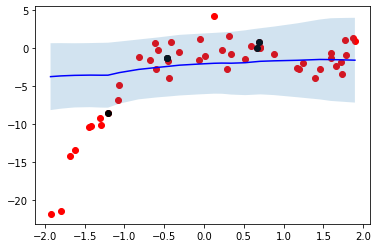

 35%|███▍      | 34999/100000 [18:35<31:16, 34.64it/s]

Mean loss at epoch 35000 : 3.1866562366485596
 Validation loss after 35000 equals 2.9342586994171143


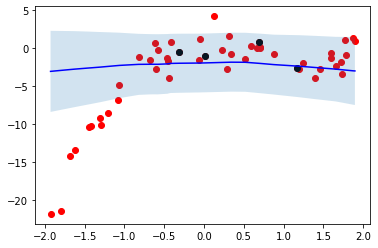

 36%|███▌      | 35999/100000 [19:05<31:45, 33.58it/s]

Mean loss at epoch 36000 : 3.271745443344116
 Validation loss after 36000 equals 2.905172824859619


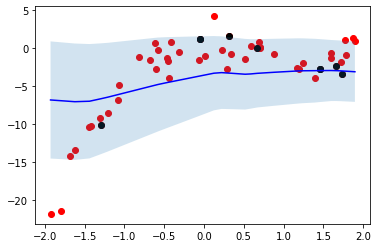

 37%|███▋      | 36999/100000 [19:34<30:06, 34.87it/s]

Mean loss at epoch 37000 : 3.0685393810272217
 Validation loss after 37000 equals 2.8794273138046265


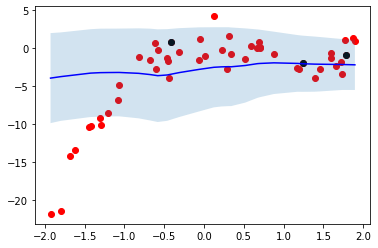

 38%|███▊      | 37999/100000 [20:04<30:11, 34.22it/s]

Mean loss at epoch 38000 : 3.1871654987335205
 Validation loss after 38000 equals 2.785294532775879


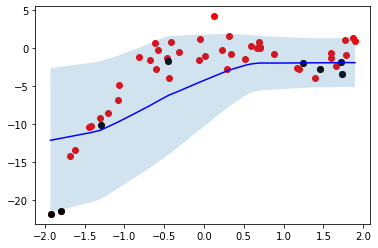

 39%|███▉      | 38997/100000 [20:35<29:26, 34.54it/s]

Mean loss at epoch 39000 : 2.9291279315948486
 Validation loss after 39000 equals 2.8979865312576294


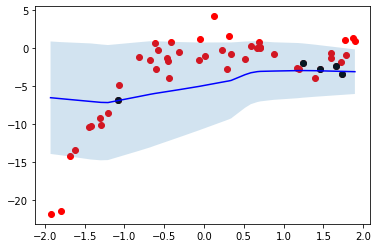

 40%|████      | 40000/100000 [21:07<29:09, 34.30it/s]  

Mean loss at epoch 40000 : 2.9521560668945312
 Validation loss after 40000 equals 3.0140323638916016


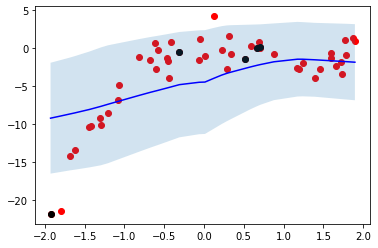

 41%|████      | 40999/100000 [21:36<28:55, 33.99it/s]

Mean loss at epoch 41000 : 3.1507461071014404
 Validation loss after 41000 equals 2.942683219909668


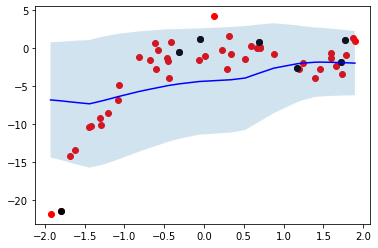

 42%|████▏     | 41999/100000 [22:06<27:57, 34.57it/s]

Mean loss at epoch 42000 : 3.1179206371307373
 Validation loss after 42000 equals 2.9659652709960938


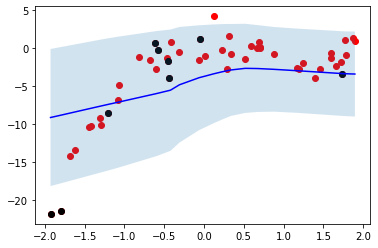

 43%|████▎     | 42998/100000 [22:38<28:26, 33.40it/s]

Mean loss at epoch 43000 : 3.271944999694824
 Validation loss after 43000 equals 2.8862346410751343


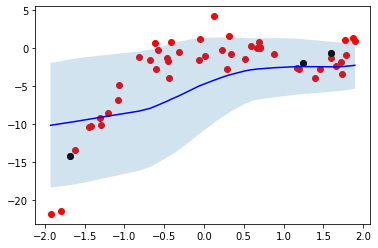

 44%|████▍     | 44000/100000 [23:10<27:35, 33.83it/s]  

Mean loss at epoch 44000 : 3.179995536804199
 Validation loss after 44000 equals 3.023256778717041


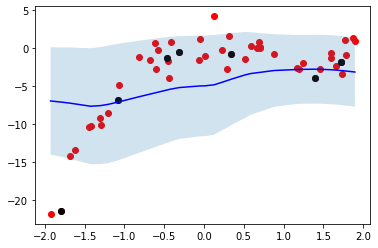

 45%|████▍     | 44998/100000 [23:41<27:15, 33.64it/s]

Mean loss at epoch 45000 : 3.124664545059204
 Validation loss after 45000 equals 2.8867759704589844


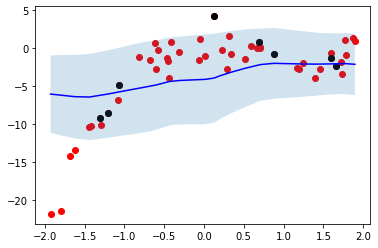

 46%|████▌     | 45998/100000 [24:11<26:40, 33.74it/s]

Mean loss at epoch 46000 : 3.183257579803467
 Validation loss after 46000 equals 2.837848424911499


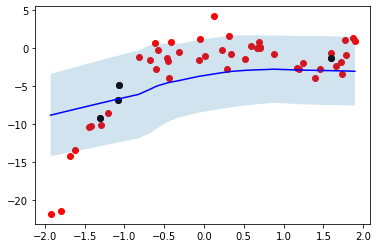

 47%|████▋     | 46999/100000 [24:46<26:16, 33.62it/s]  

Mean loss at epoch 47000 : 2.926771402359009
 Validation loss after 47000 equals 2.8648539781570435


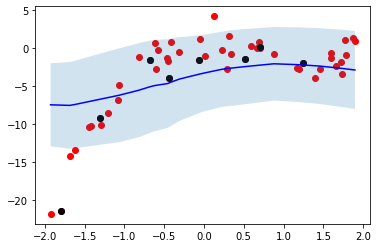

 48%|████▊     | 47997/100000 [25:16<26:05, 33.23it/s]

Mean loss at epoch 48000 : 3.0302586555480957
 Validation loss after 48000 equals 2.9602378606796265


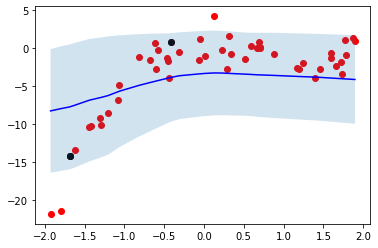

 49%|████▉     | 49000/100000 [25:47<25:14, 33.68it/s]

Mean loss at epoch 49000 : 3.155623435974121
 Validation loss after 49000 equals 2.876981496810913


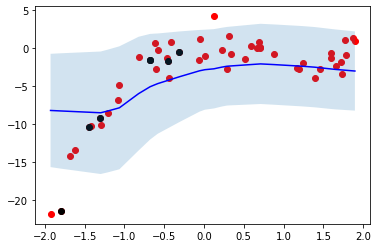

 50%|████▉     | 49998/100000 [26:18<26:06, 31.91it/s]

Mean loss at epoch 50000 : 3.1297876834869385
 Validation loss after 50000 equals 2.8774943351745605


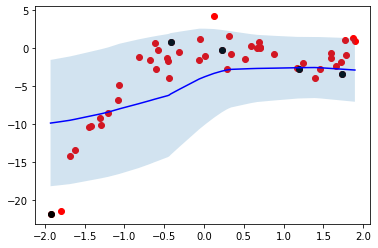

 51%|█████     | 50999/100000 [26:48<24:42, 33.06it/s]

Mean loss at epoch 51000 : 3.081812858581543
 Validation loss after 51000 equals 2.994879722595215


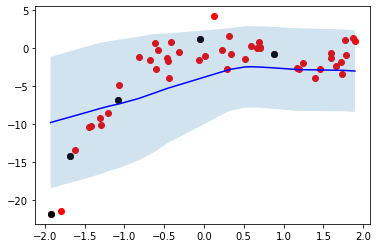

 52%|█████▏    | 51999/100000 [27:19<23:36, 33.89it/s]

Mean loss at epoch 52000 : 3.2688701152801514
 Validation loss after 52000 equals 2.9291937351226807


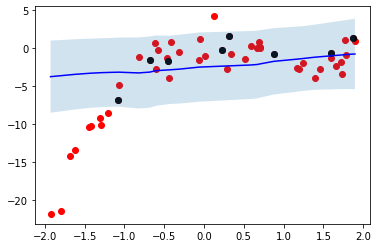

 53%|█████▎    | 52998/100000 [27:55<23:39, 33.11it/s]  

Mean loss at epoch 53000 : 3.052532434463501
 Validation loss after 53000 equals 2.9358198642730713


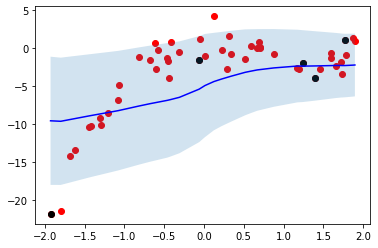

 54%|█████▍    | 54000/100000 [28:27<22:47, 33.64it/s]

Mean loss at epoch 54000 : 3.043358325958252
 Validation loss after 54000 equals 2.8402531147003174


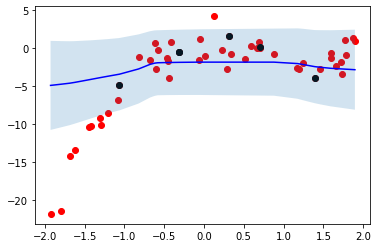

 55%|█████▍    | 54999/100000 [28:57<22:12, 33.78it/s]

Mean loss at epoch 55000 : 2.909299612045288
 Validation loss after 55000 equals 2.794709801673889


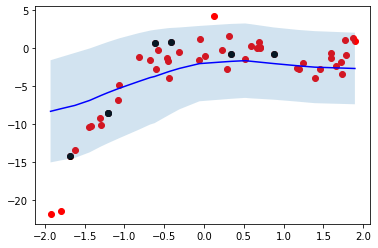

 56%|█████▌    | 55999/100000 [29:27<21:53, 33.50it/s]

Mean loss at epoch 56000 : 3.0453410148620605
 Validation loss after 56000 equals 2.8282012939453125


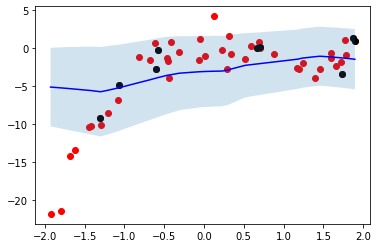

 57%|█████▋    | 56999/100000 [29:57<22:57, 31.22it/s]

Mean loss at epoch 57000 : 3.1008830070495605
 Validation loss after 57000 equals 2.8591761589050293


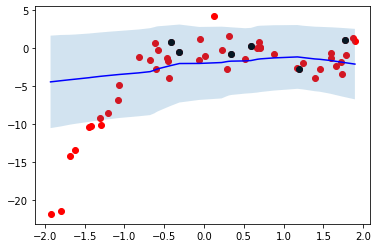

 58%|█████▊    | 57998/100000 [30:29<20:59, 33.34it/s]  

Mean loss at epoch 58000 : 3.0975465774536133
 Validation loss after 58000 equals 2.835508108139038


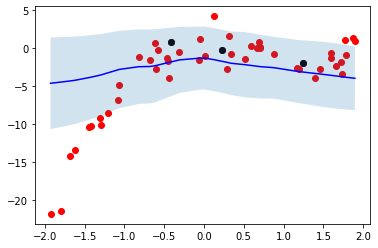

 59%|█████▉    | 58998/100000 [30:59<20:44, 32.96it/s]

Mean loss at epoch 59000 : 3.1632938385009766
 Validation loss after 59000 equals 2.9169317483901978


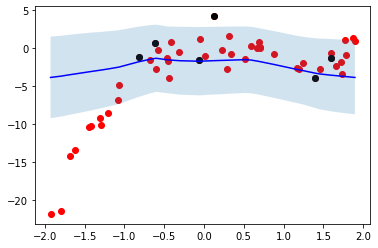

 60%|█████▉    | 59998/100000 [31:29<19:52, 33.55it/s]

Mean loss at epoch 60000 : 3.1085543632507324
 Validation loss after 60000 equals 2.832432985305786


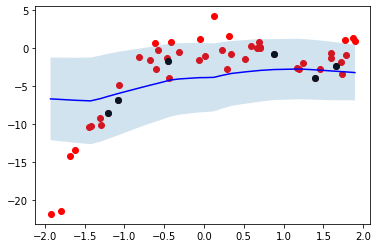

 61%|██████    | 60998/100000 [31:59<19:49, 32.78it/s]

Mean loss at epoch 61000 : 3.2278900146484375
 Validation loss after 61000 equals 2.906428575515747


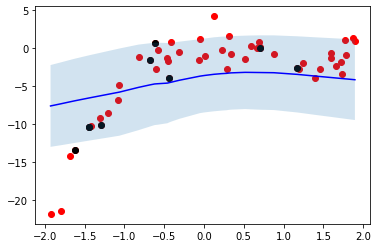

 62%|██████▏   | 62000/100000 [32:31<18:45, 33.77it/s]

Mean loss at epoch 62000 : 3.040442705154419
 Validation loss after 62000 equals 2.9390724897384644


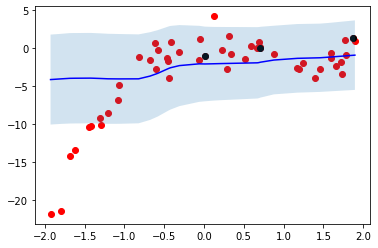

 63%|██████▎   | 62998/100000 [33:02<22:16, 27.68it/s]

Mean loss at epoch 63000 : 3.4573049545288086
 Validation loss after 63000 equals 2.9025371074676514


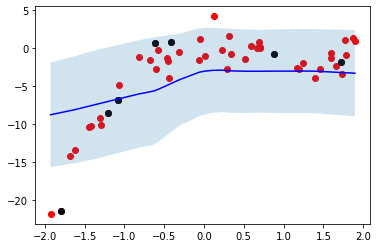

 64%|██████▍   | 64000/100000 [33:35<18:03, 33.23it/s]

Mean loss at epoch 64000 : 3.2074763774871826
 Validation loss after 64000 equals 2.885370135307312


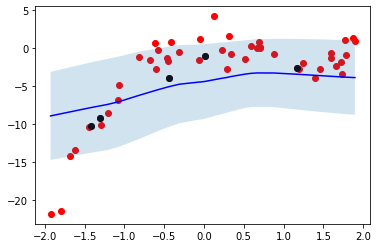

 65%|██████▌   | 65000/100000 [34:04<16:42, 34.90it/s]

Mean loss at epoch 65000 : 3.209019422531128
 Validation loss after 65000 equals 2.8028818368911743


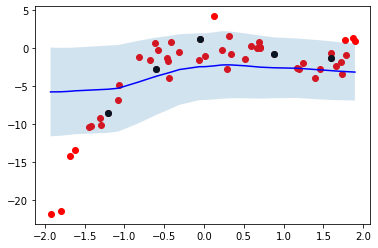

 66%|██████▌   | 66000/100000 [34:34<15:59, 35.45it/s]

Mean loss at epoch 66000 : 3.325911521911621
 Validation loss after 66000 equals 2.832824230194092


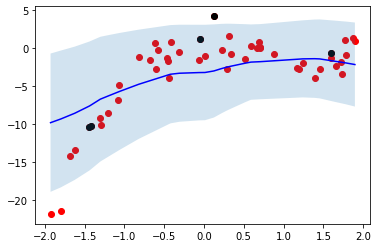

 67%|██████▋   | 67000/100000 [35:10<22:58, 23.94it/s]  

Mean loss at epoch 67000 : 3.133390426635742
 Validation loss after 67000 equals 2.876452684402466


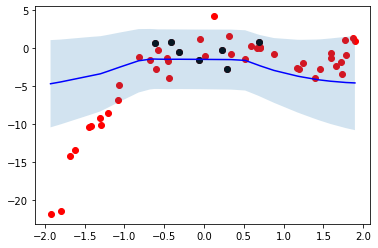

 68%|██████▊   | 67997/100000 [35:40<15:34, 34.26it/s]

Mean loss at epoch 68000 : 3.310060977935791
 Validation loss after 68000 equals 2.894322156906128


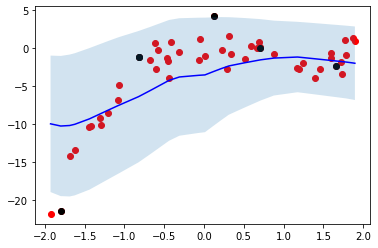

 69%|██████▉   | 68997/100000 [36:11<15:36, 33.11it/s]

Mean loss at epoch 69000 : 3.1367008686065674
 Validation loss after 69000 equals 2.8901575803756714


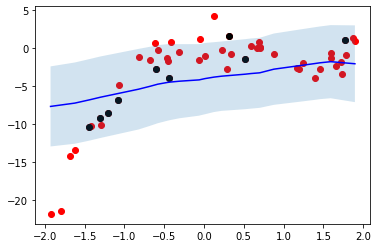

 70%|███████   | 70000/100000 [36:48<15:45, 31.73it/s]

Mean loss at epoch 70000 : 3.223330020904541
 Validation loss after 70000 equals 2.9273895025253296


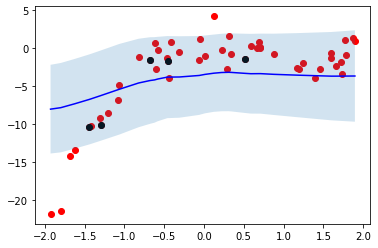

 71%|███████   | 70999/100000 [37:23<14:00, 34.49it/s]

Mean loss at epoch 71000 : 3.0766758918762207
 Validation loss after 71000 equals 2.8622671365737915


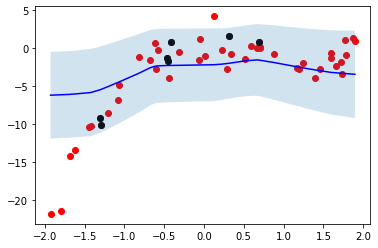

 72%|███████▏  | 71998/100000 [37:58<19:44, 23.63it/s]

Mean loss at epoch 72000 : 3.0791947841644287
 Validation loss after 72000 equals 2.7402998208999634


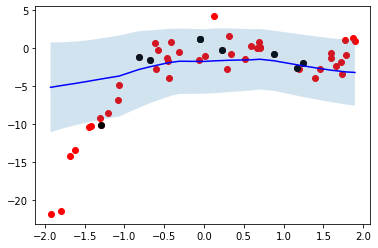

 73%|███████▎  | 72997/100000 [38:36<13:01, 34.56it/s]  

Mean loss at epoch 73000 : 3.1332461833953857
 Validation loss after 73000 equals 2.8401038646698


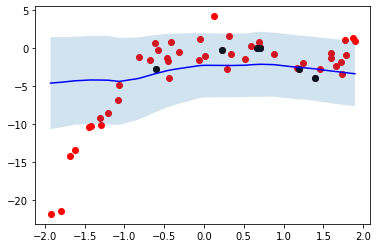

 74%|███████▍  | 73997/100000 [39:05<12:42, 34.09it/s]

Mean loss at epoch 74000 : 3.063260793685913
 Validation loss after 74000 equals 2.8626991510391235


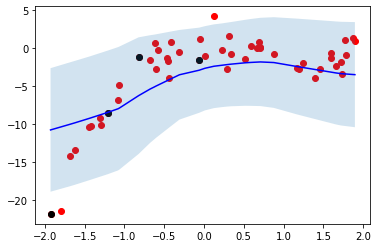

 75%|███████▍  | 74997/100000 [39:35<11:58, 34.81it/s]

Mean loss at epoch 75000 : 3.0679736137390137
 Validation loss after 75000 equals 2.855334997177124


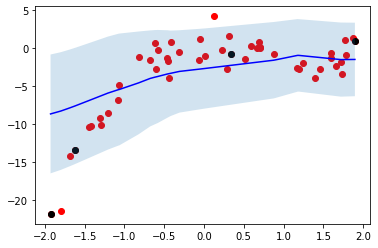

 76%|███████▌  | 75997/100000 [40:06<11:50, 33.79it/s]

Mean loss at epoch 76000 : 3.2794225215911865
 Validation loss after 76000 equals 2.805968999862671


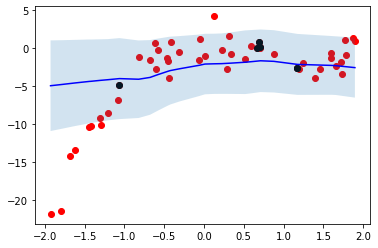

 77%|███████▋  | 76998/100000 [40:37<11:12, 34.21it/s]

Mean loss at epoch 77000 : 3.167787790298462
 Validation loss after 77000 equals 2.8850144147872925


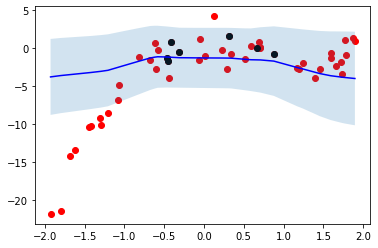

 78%|███████▊  | 78000/100000 [41:08<12:41, 28.88it/s]

Mean loss at epoch 78000 : 2.955907106399536
 Validation loss after 78000 equals 2.8133058547973633


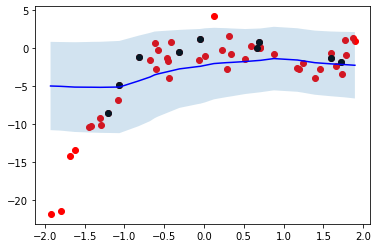

 79%|███████▉  | 78999/100000 [41:44<17:47, 19.67it/s]

Mean loss at epoch 79000 : 3.245063543319702
 Validation loss after 79000 equals 2.8616442680358887


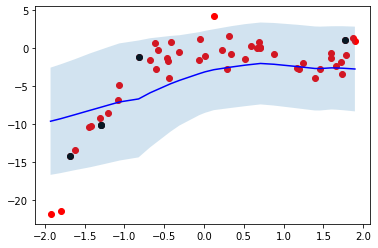

 80%|████████  | 80000/100000 [42:17<10:35, 31.47it/s]

Mean loss at epoch 80000 : 3.2647387981414795
 Validation loss after 80000 equals 2.828100085258484


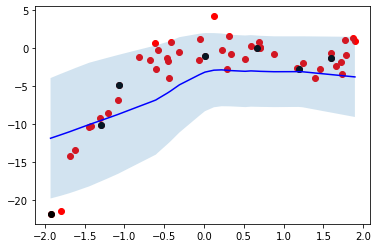

 81%|████████  | 80999/100000 [42:53<09:29, 33.34it/s]

Mean loss at epoch 81000 : 2.997734546661377
 Validation loss after 81000 equals 2.942879319190979


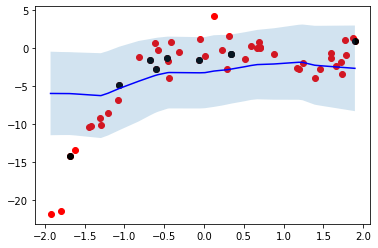

 82%|████████▏ | 81998/100000 [43:23<10:04, 29.78it/s]

Mean loss at epoch 82000 : 2.871903657913208
 Validation loss after 82000 equals 2.8938066959381104


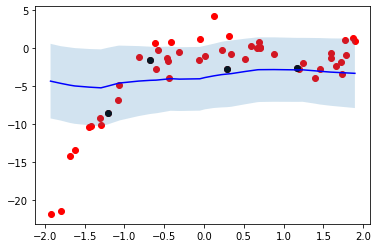

 83%|████████▎ | 83000/100000 [43:54<08:51, 32.00it/s]

Mean loss at epoch 83000 : 3.089590549468994
 Validation loss after 83000 equals 2.928191900253296


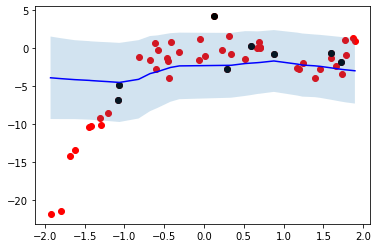

 84%|████████▍ | 83997/100000 [44:25<08:30, 31.33it/s]

Mean loss at epoch 84000 : 3.143122673034668
 Validation loss after 84000 equals 2.856370210647583


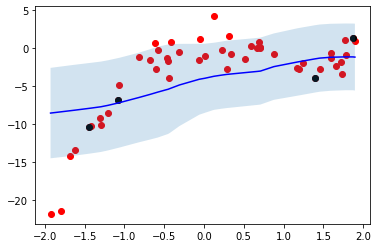

 85%|████████▍ | 84999/100000 [44:56<09:51, 25.37it/s]

Mean loss at epoch 85000 : 2.9793717861175537
 Validation loss after 85000 equals 2.873427987098694


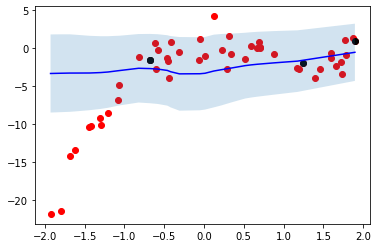

 86%|████████▌ | 85998/100000 [45:27<06:59, 33.41it/s]

Mean loss at epoch 86000 : 3.228099822998047
 Validation loss after 86000 equals 2.8033896684646606


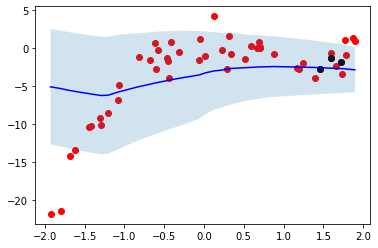

 87%|████████▋ | 86998/100000 [45:57<06:11, 35.04it/s]

Mean loss at epoch 87000 : 2.941636085510254
 Validation loss after 87000 equals 2.878265380859375


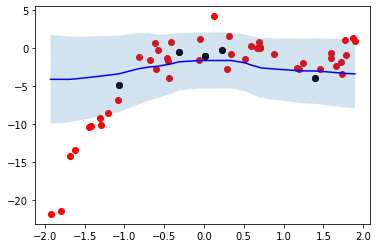

 88%|████████▊ | 87997/100000 [46:28<08:08, 24.60it/s]

Mean loss at epoch 88000 : 3.09258770942688
 Validation loss after 88000 equals 2.9223209619522095


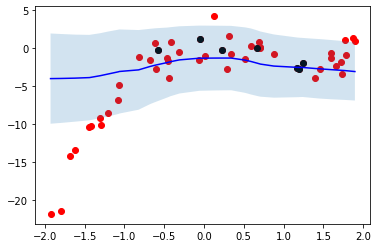

 89%|████████▉ | 89000/100000 [47:00<05:21, 34.17it/s]

Mean loss at epoch 89000 : 2.979098320007324
 Validation loss after 89000 equals 2.904930830001831


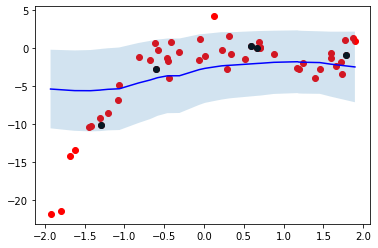

 90%|█████████ | 90000/100000 [47:47<05:45, 28.97it/s]

Mean loss at epoch 90000 : 3.231849193572998
 Validation loss after 90000 equals 2.8144805431365967


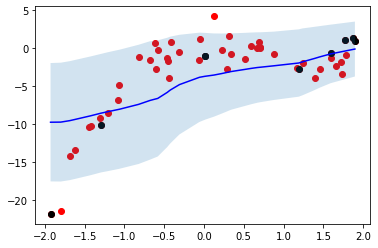

 91%|█████████ | 91000/100000 [48:33<06:53, 21.79it/s]

Mean loss at epoch 91000 : 3.0980257987976074
 Validation loss after 91000 equals 2.7605825662612915


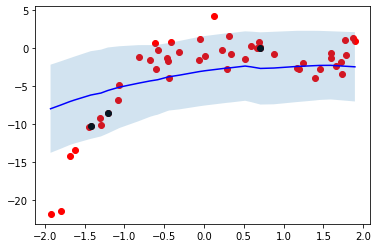

 92%|█████████▏| 91997/100000 [49:26<04:20, 30.76it/s]  

Mean loss at epoch 92000 : 3.058727979660034
 Validation loss after 92000 equals 2.911803960800171


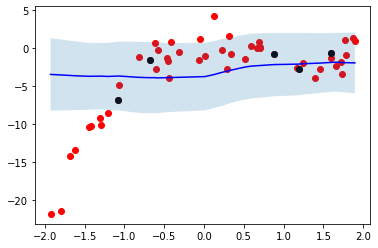

 93%|█████████▎| 93000/100000 [50:08<04:13, 27.62it/s]

Mean loss at epoch 93000 : 3.3647632598876953
 Validation loss after 93000 equals 2.919207215309143


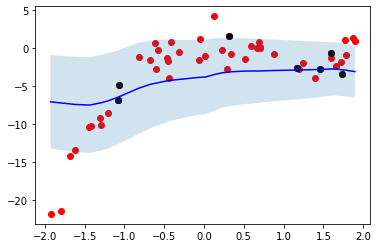

 94%|█████████▍| 93998/100000 [50:46<03:24, 29.40it/s]

Mean loss at epoch 94000 : 3.0182080268859863
 Validation loss after 94000 equals 2.772556185722351


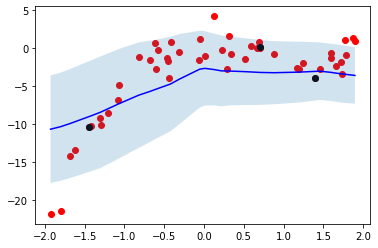

 95%|█████████▍| 94997/100000 [51:18<02:24, 34.54it/s]

Mean loss at epoch 95000 : 2.825507164001465
 Validation loss after 95000 equals 2.9136526584625244


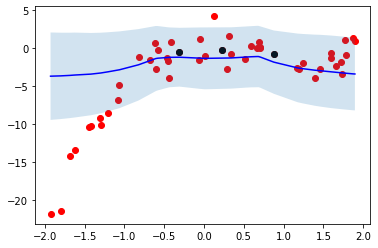

 96%|█████████▌| 95999/100000 [51:48<01:54, 34.84it/s]

Mean loss at epoch 96000 : 3.105520725250244
 Validation loss after 96000 equals 2.9131537675857544


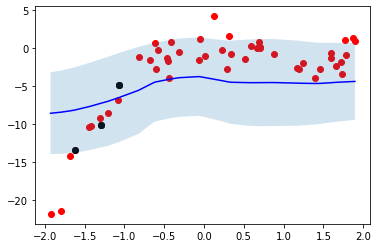

 97%|█████████▋| 96998/100000 [52:18<01:30, 33.12it/s]

Mean loss at epoch 97000 : 3.0974960327148438
 Validation loss after 97000 equals 3.049641728401184


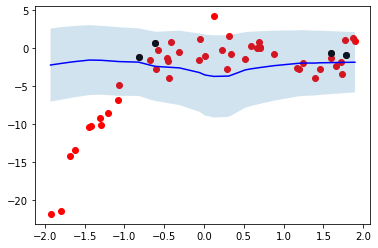

 98%|█████████▊| 97998/100000 [52:48<01:05, 30.35it/s]

Mean loss at epoch 98000 : 3.0350759029388428
 Validation loss after 98000 equals 2.765061378479004


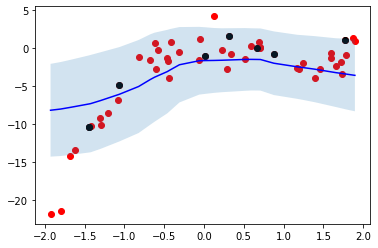

 99%|█████████▉| 98997/100000 [53:19<00:27, 36.41it/s]

Mean loss at epoch 99000 : 3.341174602508545
 Validation loss after 99000 equals 2.8636444807052612


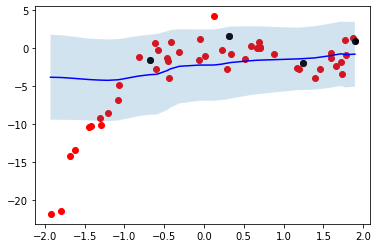

100%|██████████| 100000/100000 [53:50<00:00, 30.95it/s]


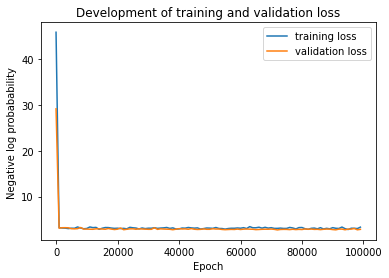

In [75]:
model_weights = trainer.run_training(**default_conf['single_function']['training_params'])


In [145]:
default_conf['single_function']['training_params']

{'kwargs': {'data_dir': 'data',
  'extension': '1d_singlefunc',
  'data_file': '1d_dataset.csv',
  'target_col': 'target',
  'train_share': 0.8,
  'seed': 0,
  'data_path': '/Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes/data/1d_singlefunc/1d_dataset.csv'},
 'plotting': True,
 'batch_size_train': 50,
 'batch_size_vali': 50}

In [36]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
dataset = pd.read_csv(
    default_conf['single_function']['training_params']['kwargs']['data_path'])

In [55]:
train, test = train_test_split(dataset,test_size=0.33)
train,test = train.reset_index(drop=True), test.reset_index(drop=True)
idx = np.random.randint(0, len(X_train),50)
X_train, y_train = train['x'][idx], train['target'][idx]
X_test, y_test = test['x'], test['target']

X_train = X_train[:,None]
X_test = X_test[:,None]

In [56]:
model = GaussianProcessRegressor()

In [57]:
model.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [58]:
y_pred = model.predict(X_test)

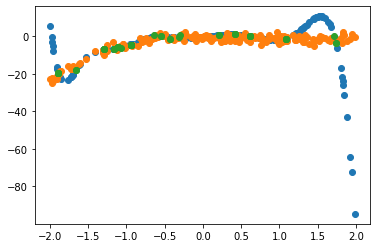

In [59]:
plt.scatter(X_test,y_pred)
plt.scatter(X_test,y_test)
plt.scatter(X_train, y_train)